In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('onlinefraud.csv')

In [ ]:
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Check for Null Values and Duplicate Records

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes


,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


In [ ]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

Check Outliers(IQR)

In [ ]:


# Define the IQR method function that returns both count and actual outliers
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers.sum(), df[outliers]


numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


for col in numeric_cols:
    count, outliers_df = detect_outliers_iqr(df, col)
    print(f"Number of outliers in {col} based on IQR method: {count}")
    print(f"Actual outliers in {col}:")
    print(outliers_df)
    print("\n")


Number of outliers in amount based on IQR method: 76532
Actual outliers in amount:
         step      type      amount     nameOrig  oldbalanceOrg  \
85          1  TRANSFER  1505626.01   C926859124           0.00   
86          1  TRANSFER   554026.99  C1603696865           0.00   
88          1  TRANSFER   761507.39   C412788346           0.00   
89          1  TRANSFER  1429051.47  C1520267010           0.00   
93          1  TRANSFER   583848.46  C1839168128           0.00   
...       ...       ...         ...          ...            ...   
1509568   144  TRANSFER   594947.94  C1512295656           0.00   
1509570   144  TRANSFER   947011.45   C320384485           0.00   
1509571   144  TRANSFER   916879.43  C2091582825           0.00   
1509671   145  TRANSFER  1767886.02  C1544286887     1767886.02   
1509672   145  CASH_OUT  1767886.02  C1487625973     1767886.02   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
85                  0.0   C6655

In [ ]:
df['isFraud'].value_counts()


,count
isFraud,
0.0,1508054
1.0,1634


EDA

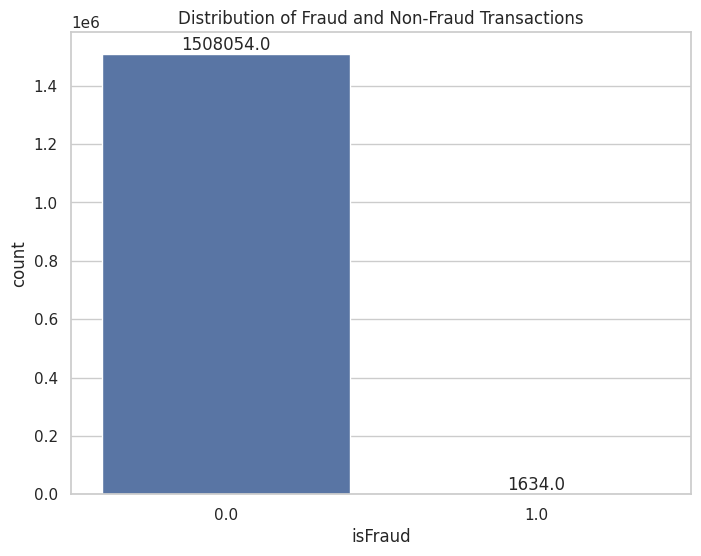

In [ ]:
#Analyze Fraud Distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='isFraud', data=df)
plt.title('Distribution of Fraud and Non-Fraud Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.show()


In [ ]:
# Analyze transaction types
print(df['type'].value_counts())

type
CASH_OUT    536865
PAYMENT     507593
CASH_IN     330141
TRANSFER    124884
DEBIT        10206
Name: count, dtype: int64


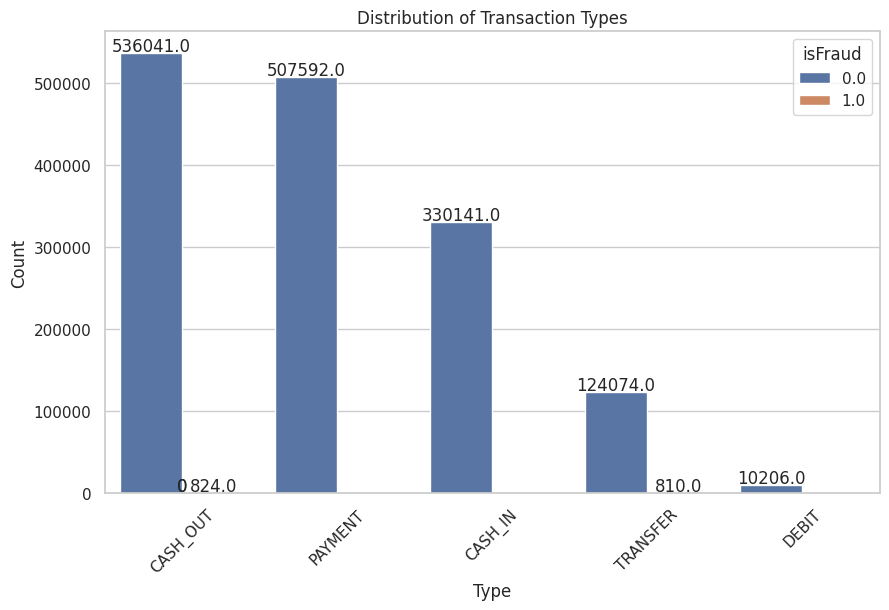

In [ ]:
#Visualize Transaction Types
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
ax = sns.countplot(x='type', data=df, order=df['type'].value_counts().index,hue='isFraud')


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Transaction Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Steps Analysis
print(df['step'].value_counts())

step
19     51352
18     49579
139    46054
43     45060
15     44609
       ...  
76         4
29         4
28         4
54         4
112        2
Name: count, Length: 145, dtype: int64


In [ ]:
min_value = df['step'].min()
max_value = df['step'].max()

range_value = max_value - min_value
print(f"Min: {min_value}, Max: {max_value}, Range: {range_value}")

Min: 1, Max: 145, Range: 144


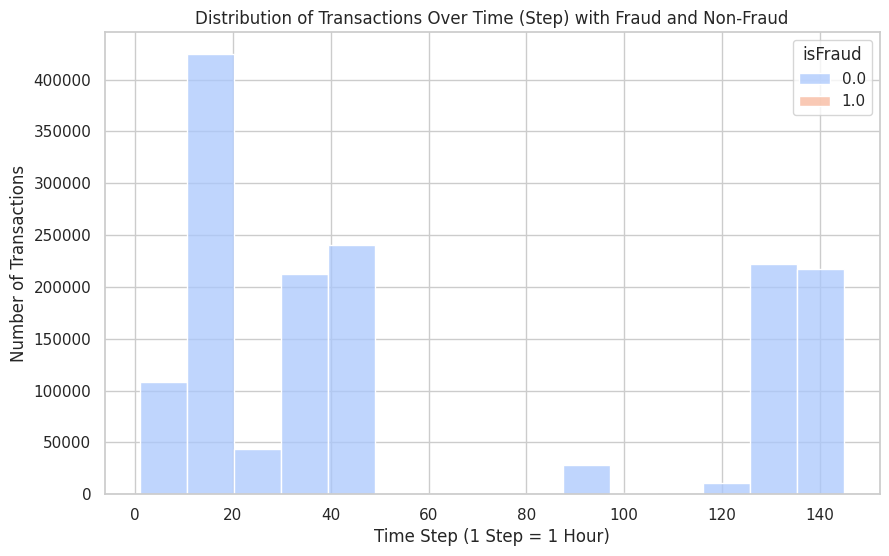

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='step', hue='isFraud', bins=15, kde=False, palette='coolwarm', multiple='stack')
plt.title('Distribution of Transactions Over Time (Step) with Fraud and Non-Fraud')
plt.xlabel('Time Step (1 Step = 1 Hour)')
plt.ylabel('Number of Transactions')
plt.show()


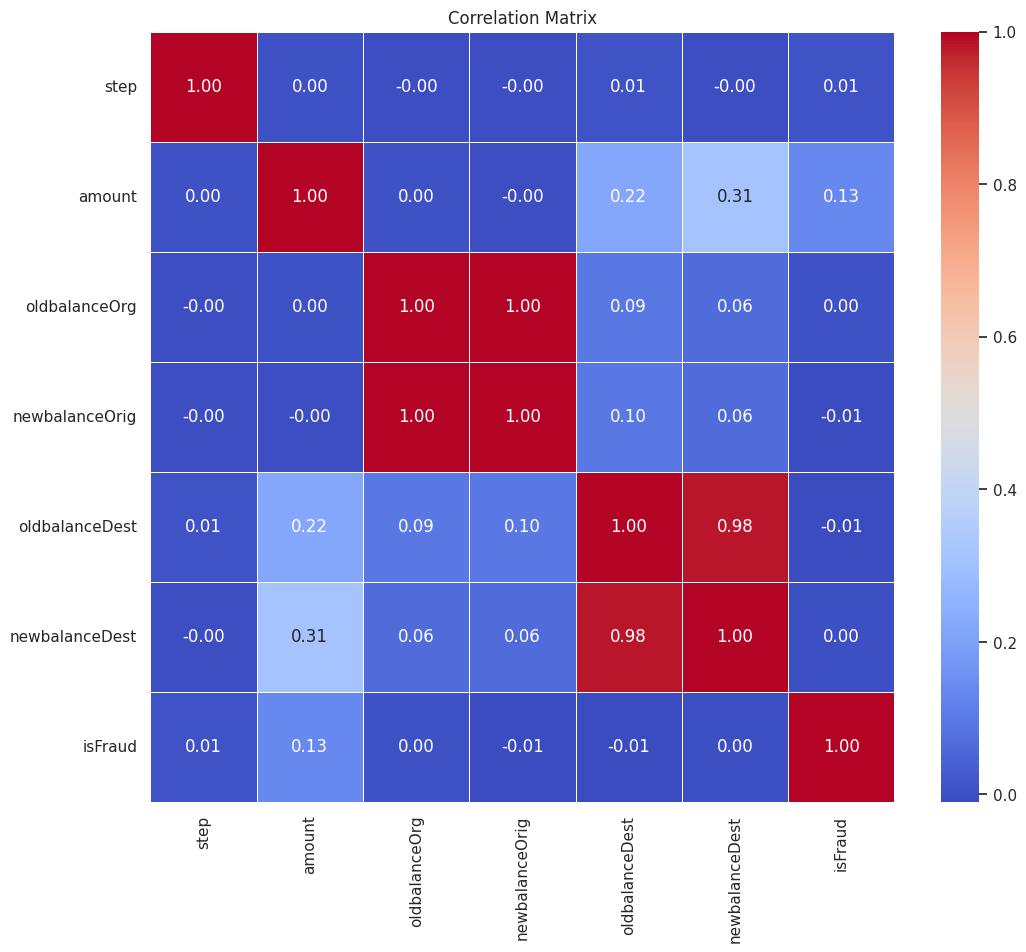

In [ ]:
cols = df.select_dtypes(include=['number']).columns


columns_to_exclude = ['nameOrig_encoded', 'nameDest_encoded','isFlaggedFraud']
filtered_cols = [col for col in cols if col not in columns_to_exclude]
corr_matrix = df[filtered_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()